# Chocolate Data Explorations
## by Marina Atlija
* Since we had an opportunity to choose a dataset,I decided to search for one on Kaggle. Moreover, in order to choose one there are specific features that the dataset has to comply with, i.e. more than 600 rows, 8 columns, and it has to have at least one categorical and one numerical column).
    > This document contains information from 2006 to 2020 in 66 countries about chocolate reviews and tastes. 
    
    > The dataset is downloaded from the Kaggle: https://www.kaggle.com/soroushghaderi/chocolate-bar-2020?select=chocolate.csv
    
    > This dataset has a total of 20 columns and 2224 columns.
    
    > The column names are: *'ref', 'company', 'company_location', 'review_date', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name', 'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste', 'fourth_taste'*
    

## Preliminary Wrangling
 The first step is to see features and to decide what we can explore and which questions we can explore.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
#load the datasets into pandas DataFrames and print first five rows
df = pd.read_csv('chocolate.csv',index_col=0)
df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [8]:
#print the size of the file and column names, info about Nulls and datatype
print(df.shape, '\n')
print(df.columns,'\n')
print(df.info(),'\n')
print(df.describe())

(2224, 20) 

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2223
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2224 non-null   int64  
 1   company                           2224 non-null   object 
 2   company_location                  2224 non-null   object 
 3   review_date                       2224 non-null   int64  
 4   country_of_bean_origin            2224 non-null   object 
 5   specific_bean_origin_or_bar_name  2224 non-nul

### Quality issues 
* third_taste and fourth_taste column have a lot of NaNs -> check if something can be done about it
 > * it seems that these variables did not have any info since the person who test it did not have additional response to the chocolate bar
 > * moreover all taste features have too many diferent tastes that is difficult to group them. More samples should be avaliable and who is tasting these chocolates should stick with basic aromas, adding some additional features just complicate things.
* maybe do some changes with ingredient columns, combine them in one column.


In [9]:
#copy dataset
choco_df = df.copy()
choco_df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [10]:
#Change columns that contains information about ingredients
#beans cocoa_butter vanilla lecithin salt sugar sweetener_without_sugar
# first replace have_not_ with No, and then have_ with Yes

for col in ['beans', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']:
    choco_df[col] = choco_df[col].replace('have_not_.+', 'No', regex=True)
    choco_df[col] = choco_df[col].replace('have_.+', 'Yes', regex=True)

In [11]:
# check if the changes are sucessfully made
choco_df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,Yes,Yes,No,No,No,Yes,No,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,Yes,Yes,No,No,No,Yes,No,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,Yes,Yes,No,No,No,Yes,No,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,Yes,Yes,No,Yes,No,Yes,No,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,Yes,Yes,No,Yes,No,Yes,No,vegetal,nutty,NaN,NaN


In [12]:
# add index_id column to use it as primary key when later on we will use merge command
choco_df['index_id']= choco_df.index.astype(str)
choco_df.head(10)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,...,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,index_id
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,Yes,...,No,No,No,Yes,No,cocoa,blackberry,full body,NaN,0
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,Yes,...,No,No,No,Yes,No,cocoa,vegetal,savory,NaN,1
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,Yes,...,No,No,No,Yes,No,rich cocoa,fatty,bready,NaN,2
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,Yes,...,No,Yes,No,Yes,No,fruity,melon,roasty,NaN,3
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,Yes,...,No,Yes,No,Yes,No,vegetal,nutty,NaN,NaN,4
5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.00,4,Yes,...,No,Yes,No,Yes,No,oily,nut,caramel,raspberry,5
6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.00,3,Yes,...,No,No,No,Yes,No,sweet,cocoa,tangerine,NaN,6
7,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,3.75,4,Yes,...,No,Yes,No,Yes,No,sandy,nutty,cocoa,fig,7
8,1019,A. Morin,France,2013,Peru,Chanchamayo Province,70.0,3.50,4,Yes,...,No,Yes,No,Yes,No,cocoa,sour,intense tangerine,NaN,8
9,1011,A. Morin,France,2013,Brazil,Brazil,70.0,3.25,4,Yes,...,No,Yes,No,Yes,No,mild tobacco,NaN,NaN,NaN,9


In [13]:
# check columns names
choco_df.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'index_id'],
      dtype='object')

In [14]:
#check for duplicated values
print('Number of duplicated values:',sum(choco_df.duplicated()))

Number of duplicated values: 0


In [15]:
# check for shape of dataset
choco_df.shape

(2224, 21)

In [16]:
#split the dataset in three subsets in order to do some data manipulations
choco_df_v1 = choco_df[['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'index_id']]

df_ingredients = choco_df[['index_id','beans', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar']]

df_taste = choco_df[['first_taste', 'second_taste', 'third_taste','fourth_taste', 'index_id']]

print(df_ingredients.shape)

df_ingredients.head()

(2224, 8)


,index_id,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,0,Yes,Yes,No,No,No,Yes,No
1,1,Yes,Yes,No,No,No,Yes,No
2,2,Yes,Yes,No,No,No,Yes,No
3,3,Yes,Yes,No,Yes,No,Yes,No
4,4,Yes,Yes,No,Yes,No,Yes,No


In [17]:
#check the first five rows of the subset
df_taste.head()

,first_taste,second_taste,third_taste,fourth_taste,index_id
0,cocoa,blackberry,full body,NaN,0
1,cocoa,vegetal,savory,NaN,1
2,rich cocoa,fatty,bready,NaN,2
3,fruity,melon,roasty,NaN,3
4,vegetal,nutty,NaN,NaN,4


In [18]:
#use melt function to change dataset

#https://www.w3resource.com/pandas/dataframe/dataframe-melt.php <- used link to perform melt function

df_ingred_melt = df_ingredients.melt(id_vars=['index_id'], 
                                     value_vars=['beans', 'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar', 'sweetener_without_sugar'],
                                     var_name='Ingredient', value_name='Present')
print(df_ingred_melt.shape)
df_ingred_melt.sort_values('index_id')

(15568, 3)


,index_id,Ingredient,Present
0,0,beans,Yes
8896,0,salt,No
6672,0,lecithin,No
13344,0,sweetener_without_sugar,No
4448,0,vanilla,No
...,...,...,...
5447,999,vanilla,No
12119,999,sugar,Yes
9895,999,salt,No
3223,999,cocoa_butter,Yes


In [19]:
# use melt function on tastes features as well
df_taste_melt = df_taste.melt(id_vars=['index_id'], value_vars = ['first_taste', 'second_taste', 'third_taste','fourth_taste']
                             , var_name = 'N_of_taste', value_name = 'Aromas')
df_taste_melt.sort_values('index_id')

,index_id,N_of_taste,Aromas
0,0,first_taste,cocoa
2224,0,second_taste,blackberry
4448,0,third_taste,full body
6672,0,fourth_taste,NaN
1,1,first_taste,cocoa
...,...,...,...
5446,998,third_taste,NaN
5447,999,third_taste,NaN
7671,999,fourth_taste,NaN
999,999,first_taste,nutty


In [20]:
#check the number of counts for cocoa_butter
choco_df.cocoa_butter.value_counts()

Yes    1535
No      689
Name: cocoa_butter, dtype: int64

In [21]:
#merge two dataset
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

choco_melt = pd.merge(choco_df_v1, df_ingred_melt, on='index_id', how='left')
choco_melt = pd.merge(choco_melt, df_taste_melt, on ='index_id', how='left')
print(choco_melt.shape)


(62272, 14)


In [22]:
#check the tail of the dataset
choco_melt.tail()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,index_id,Ingredient,Present,N_of_taste,Aromas
62267,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,3,2223,sugar,Yes,fourth_taste,NaN
62268,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,3,2223,sweetener_without_sugar,No,first_taste,fatty
62269,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,3,2223,sweetener_without_sugar,No,second_taste,earthy
62270,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,3,2223,sweetener_without_sugar,No,third_taste,cocoa
62271,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,3,2223,sweetener_without_sugar,No,fourth_taste,NaN


In [23]:
# save file
#choco_melt.to_csv('choco_melt.csv', index=False)
#list all columns 
list(choco_melt.columns)

['ref',
 'company',
 'company_location',
 'review_date',
 'country_of_bean_origin',
 'specific_bean_origin_or_bar_name',
 'cocoa_percent',
 'rating',
 'counts_of_ingredients',
 'index_id',
 'Ingredient',
 'Present',
 'N_of_taste',
 'Aromas']

### What is the structure of your dataset?

> After some checking and reorganising of dataset, there a total of 2224 different tested chocolates through 2006 to 2020. There is a total of 14 variables, where some variables are melted in order to easily determine which chocolate has a specific ingredient and aroma for specific order of testing.

##### List of variables and description: 
 * ref - unique number for company
 * company - Name of the company manufacturing the bar
 * company_location - Manufacturer base country
 * review_date - date review for chocolate bar -> only the year is provided
 * country_of_bean_origin - country of chocolate bean
 * specific_bean_origin_or_bar_name - province of chocolate bean
 * cocoa_percent - Cocoa percentage (darkness) of the chocolate bar being reviewed
 * rating - chocolate bar rating
 * counts_of_ingredients - number of ingredients
 * index_id - index
 * Ingredient - names of ingredients
 * Present - is ingredient present or not
 * 'N_of taste' (Aromas - the aromas that apears when chocolate is tasted)
 > first_taste - taste number one, 
 > second_taste - taste number two, 
 > third_taste - taste number three, 
 > fourth_taste - taste number four
 

### What is/are the main feature(s) of interest in your dataset?

>  The main feature is to see which ingredients are crucial for high rating chocolate. Morever, I would like to know if the specifi country where choco beans produced has some impact of chocolate rating and also the year when the chocolate were tested. 
> In addition, I will also try to see if there exist a relationship between the cocoa percent and chocolate bar rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ref, company, company_location, review_date, country_of_bean_origin, specific_bean_origin_or_bar_name, cocoa_percent, rating, counts_of_ingredients, first_taste,second_taste, index_id, Ingredient, Present

## Univariate Exploration

In [24]:
#since we have a huge number of repetitions because of applying melt function on our dataset, if we plot these variables the numbers will be off
# to avoid that we extracted specific columns, where we have rid of duplicated rows, for which we can build univariate plots and present a true count of chocolate bars

dataset_hist = choco_melt[['ref','company', 'company_location','country_of_bean_origin','specific_bean_origin_or_bar_name', 'counts_of_ingredients', 'rating', 'cocoa_percent', 'review_date', 'index_id']]
dataset_hist_2 = dataset_hist.drop_duplicates()
dataset_hist_2.shape

(2224, 10)

In [25]:
#plt.figure(figsize=(10,8)) #plot size
#dataset_hist_2['ref'].plot.hist(bins = 20); #size of bins
#plt.title("The histogram of unique number for company", fontsize= 15)
#plt.xlabel('The unique number for company', fontsize = 12);
#plt.ylabel('Frequency', fontsize = 12);

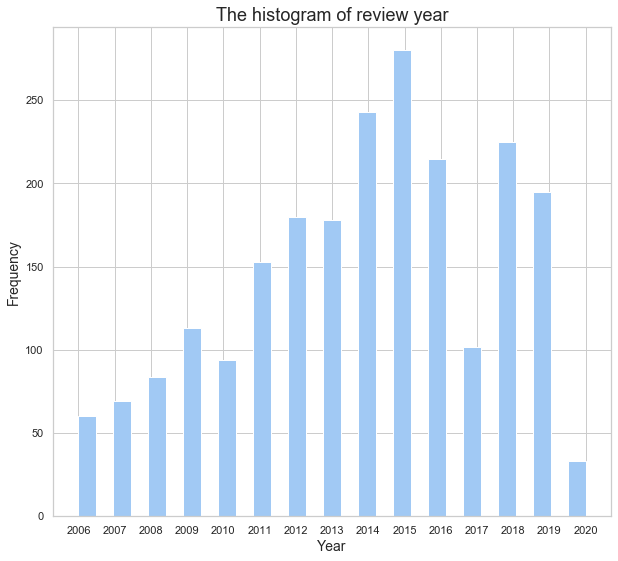

In [26]:
#Buid the histogram where we can observe the number of reviews per year

sb.set(style="whitegrid", palette="pastel", color_codes=True)

plt.figure(figsize=(10,9)) #plot size
dataset_hist_2['review_date'].plot.hist(xticks=(2006,2007,2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020), bins = 29); #size of bins
plt.title("The histogram of review year", fontsize= 18)
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);

On this histogram we can observe that the number of chocolate bar reviews per year. 
From 2006 to 2015 we can observe steady growth of the number of reviews with peak on 2015. After 2015 year the number of reviws decreased where on 2017 year could be seen a significant decline of number of reviews in comparation with 2016 and 2018 years. 

The low number of reviews for 2020 is expected since 2020 is not over yet.


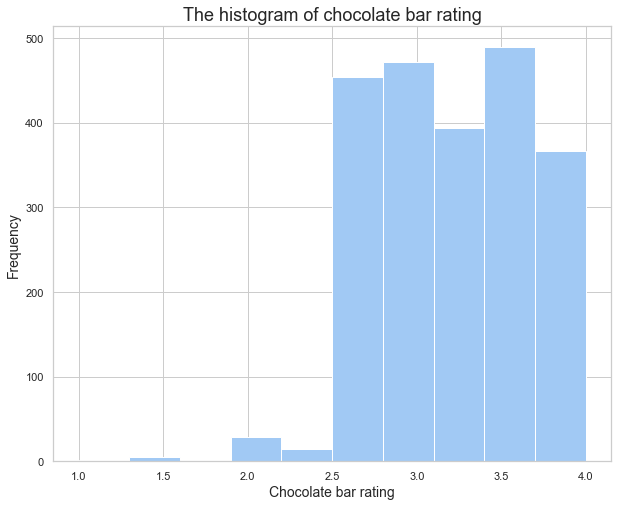

In [27]:
# Build the histogram of ratings to see the distribution of chocolate bar ratings

plt.figure(figsize=(10,8)) #plot size
dataset_hist_2['rating'].plot.hist(bins = 10); #size of bins
plt.title("The histogram of chocolate bar rating", fontsize= 18)
plt.xlabel('Chocolate bar rating', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);
plt.show()

From this plot we can say that majority of chocolate bars have rating between 2.5 and 4, while there are a few chocolate bars that have the rating value below 2.5.

What we can see is that there are no chocolate bars that have a rating value greather of 4.

I would say that this observations is expected, since during this survey they concentrated only on reviewing dark chocolate which does not have too many ingredients as milk chocolate which could have more influence on ratings.

Moreover, it seems that chocolate bars that got a very low rating points is because something was very wrong with the taste of these chocolates.

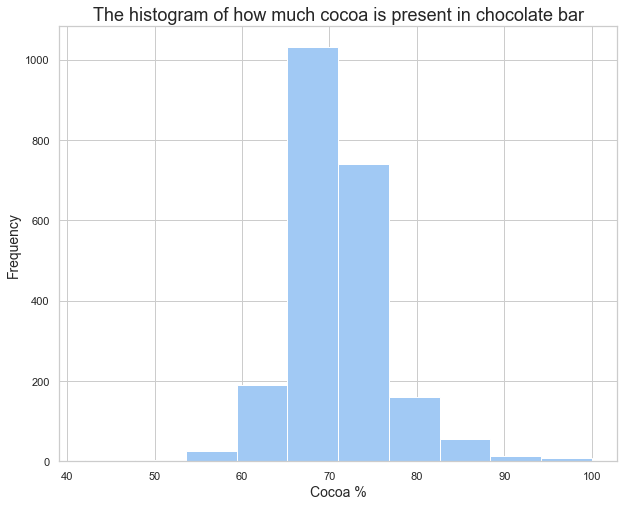

In [28]:
# build the histogram plot of the cocoa percentage 
plt.figure(figsize=(10,8)) #plot size
dataset_hist_2['cocoa_percent'].plot.hist(bins = 10); #size of bins
plt.title("The histogram of how much cocoa is present in chocolate bar", fontsize= 18)
plt.xlabel('Cocoa %', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);

From this graph we can see that most of chocolate bars, which are tested here, contain between 65 to 75 cocoa % in chocolate.
The distribution can be considered as normal.

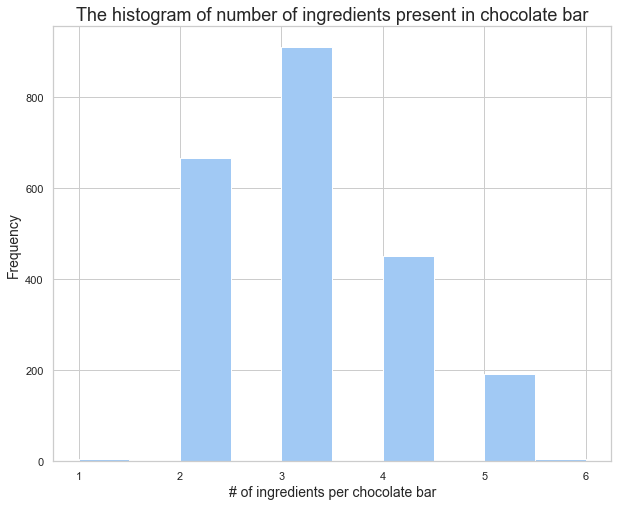

In [29]:
# plot ingredients 
plt.figure(figsize=(10,8)) #plot size
dataset_hist_2['counts_of_ingredients'].plot.hist(bins = 10); #size of bins
plt.title("The histogram of number of ingredients present in chocolate bar", fontsize= 18)
plt.xlabel('# of ingredients per chocolate bar', fontsize = 14);
plt.ylabel('Frequency', fontsize = 14);

The reviwed chocolate bars mostly were made from 2 or 3 ingredents.
As we can see there are a few exeptions where chocolate bar had 1 or 6 infredients.

/Users/matlija/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


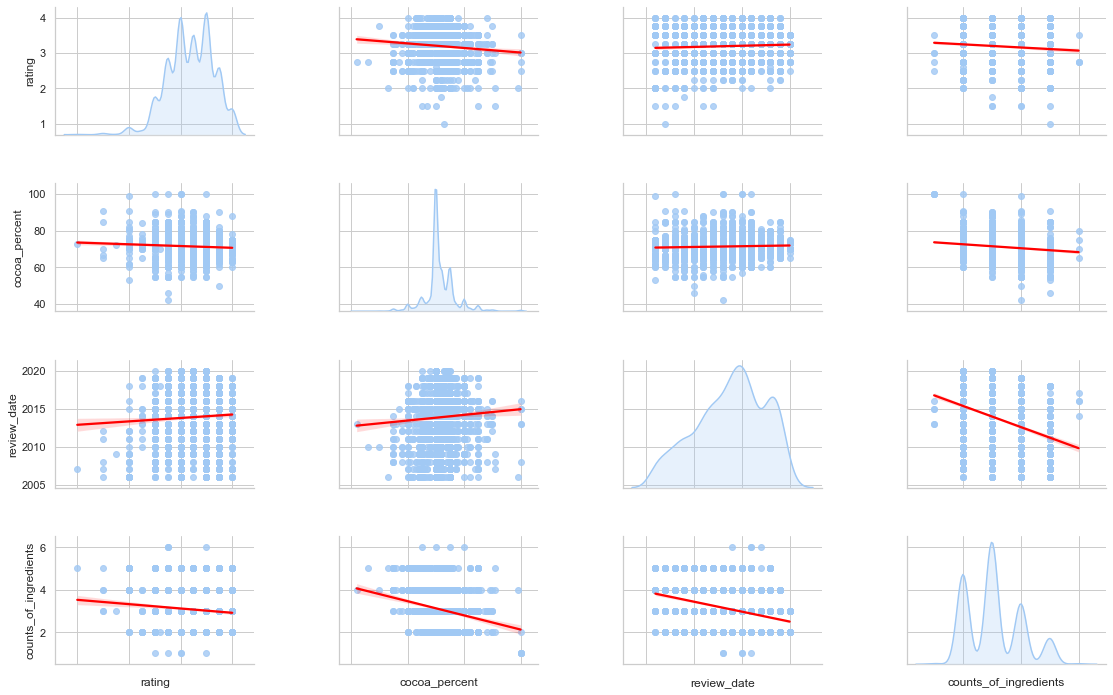

In [30]:
# another way how to present distibution of columns and association between variables (# hue='counts_of_ingredients') -> use this feature to see how is divided by counts_of_ingredients groups 
#pairplots
plots = sb.pairplot(dataset_hist_2[['rating', 'cocoa_percent', 'review_date','counts_of_ingredients']], 
                   size=1.5, diag_kind='kde',  kind="reg", plot_kws={'line_kws':{'color':'red'}});

plots.set(xticklabels=[]);
plots.fig.set_size_inches(17,10)

From scaterplots above we can see a mostly week association between these four variables. 

The scatterplot bewteen counts_of_ingredientes and review_date shows a negative association which shows that through time the number of ingredients in chocolate bars is decreasing. It means that chocolate bars if have fewer ingredients got a better ratings were more favorable than ones with more ingredients.

Moreover there is another negative association between counts_of_ingredients and cocoa_percent, which is quite obvious, the number of ingredients are decreasing when number of cocoa percent is increasing.


In [31]:
# prepare data for the bar plot
# Group chocolate bars by country of bean origin
# The most representated country by checking this dataset
countries=dataset_hist_2['country_of_bean_origin'].value_counts().reset_index().head(20)

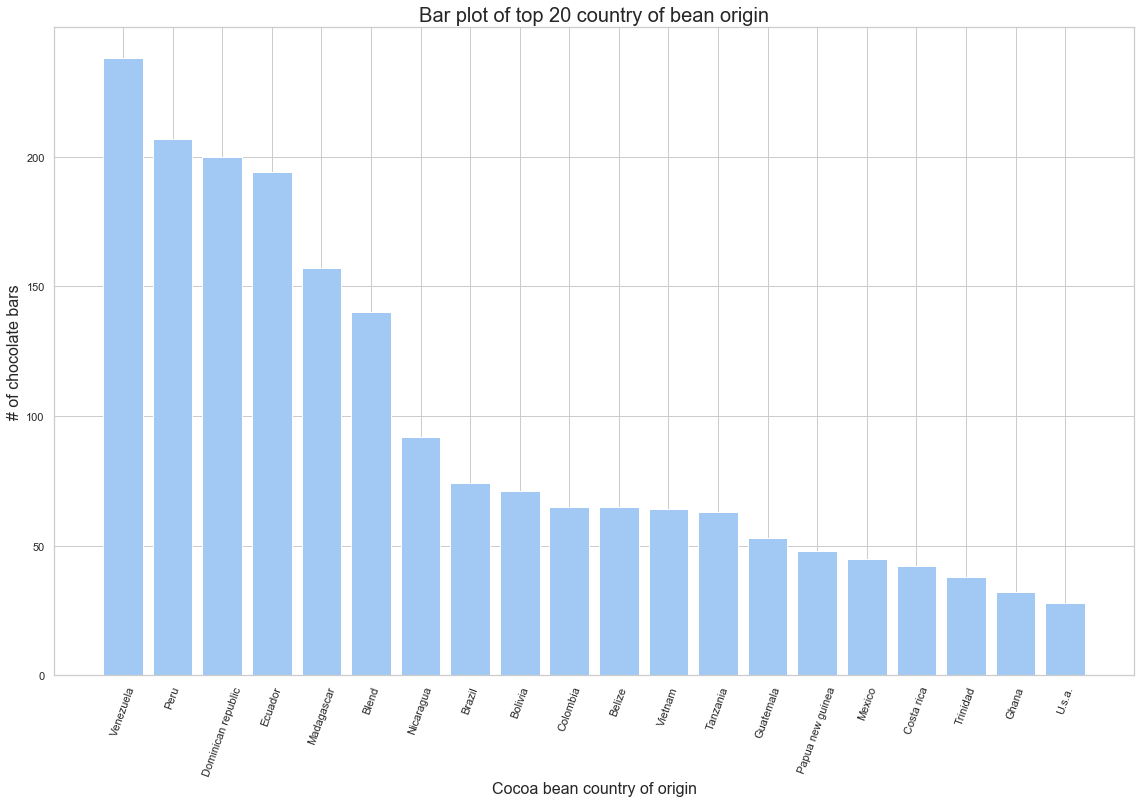

In [32]:
#Since there is a total of 62 countries of bean origin we will plot the a total of 20 countries with highest number of chocolate bars.
#top 20 countries
fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
country = countries['index']
counts = countries['country_of_bean_origin']
ax.bar(country,counts)
ax.set_title('Bar plot of top 20 country of bean origin', fontsize = 20)
ax.set_xlabel('Cocoa bean country of origin',fontsize = 16)
ax.set_ylabel('# of chocolate bars',fontsize = 16)
ax.set_xticklabels(country, rotation= 70) 
plt.show()

#used links
#https://www.delftstack.com/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

There is a total of 62 countries of bean orgin, and here we shown only the top 20. From the top 20 we can see that the reviewed chocolate bars are comming from top five countries: Venezuela, Peru, Dominican republic, Ecuador and Madagascar.

Discrepancies: I have not heard about 'Blend' country which is positioned as the sixth country in this plot. (https://www.countries-ofthe-world.com/all-countries.html). 

However, I have found that some countries are refered as 'blend' due to defenition that they are IDA-eligible but also creditworthy for some IBRD borrowing. 

Links:
https://ida.worldbank.org/about/borrowing-countries#:~:text=Some%20countries%2C%20such%20as%20Nigeria,eligible%20to%20receive%20IDA%20resources. 

https://datahelpdesk.worldbank.org/knowledgebase/articles/378834-how-does-the-world-bank-classify-countries

Therefore, in this case we can't know with certantry from where this cacao beans are comming. 

In [33]:
#prepare dataset for the plot
countries_comp=dataset_hist_2['company_location'].value_counts().reset_index().head(20)

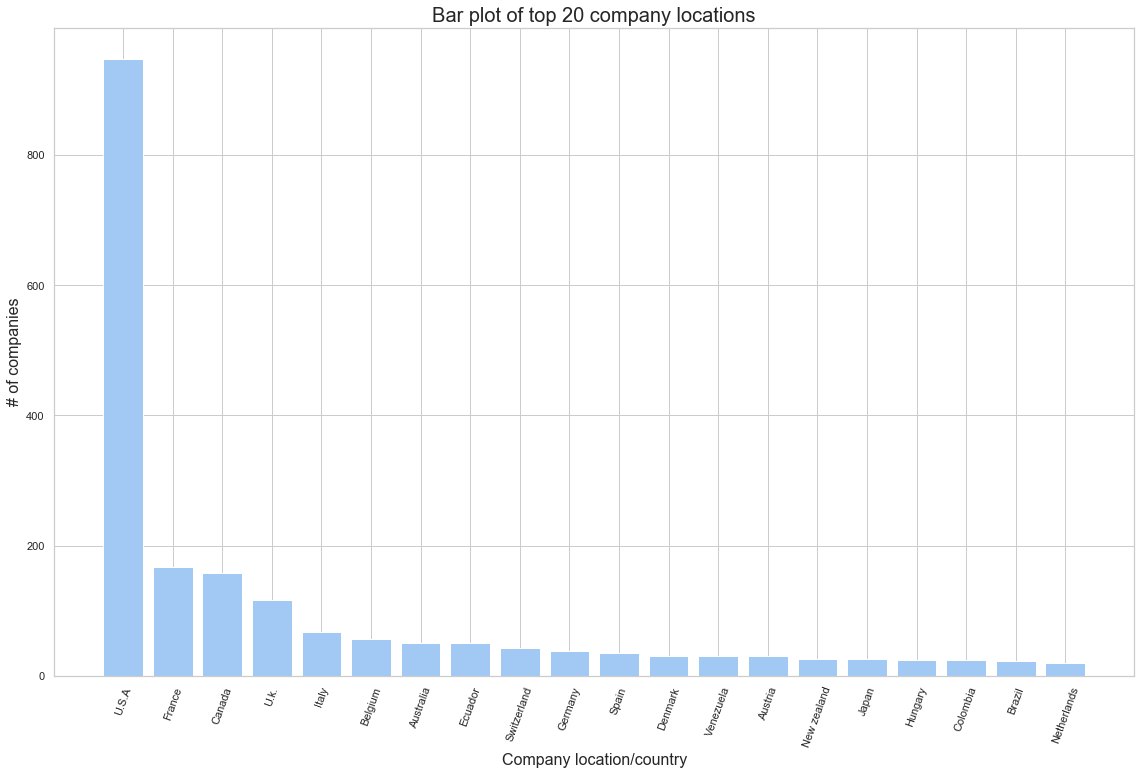

In [34]:
# build the bar plot - show company locations

fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
country = countries_comp['index']
counts = countries_comp['company_location']
ax.bar(country,counts)
ax.set_title('Bar plot of top 20 company locations', fontsize = 20)
ax.set_xlabel('Company location/country',fontsize = 16)
ax.set_ylabel('# of companies',fontsize = 16)
ax.set_xticklabels(country, rotation= 70) 
plt.show()

There is a total of 66 country locations of chocolate bar companies, however, we will show only the first 20ty companies' locations.

As we can see here, most chocolate bar companies are based in the U.S.A. There is no merit in dive in into this variable more, since other locations have a low number of reviewed chocolate bars.

In [35]:
# prepare dataset that will be used for a bar plot
# Here we want to see a representation of ingredients in reviewed chocolate bars, 
# where we also group them by examining if the ingredient is present or not

ingredients = choco_melt[['index_id','Ingredient','Present']]
ingredients = ingredients.drop_duplicates()
print(ingredients.shape)
print(ingredients.head())

#group by ingredient and by presence 
g_ingredients = ingredients.groupby('Ingredient',)['Present'].value_counts().reset_index(name='count')
print(g_ingredients)

(15568, 3)
   index_id    Ingredient Present
0         0         beans     Yes
4         0  cocoa_butter     Yes
8         0       vanilla      No
12        0      lecithin      No
16        0          salt      No
                 Ingredient Present  count
0                     beans     Yes   2224
1              cocoa_butter     Yes   1535
2              cocoa_butter      No    689
3                  lecithin      No   1745
4                  lecithin     Yes    479
5                      salt      No   2187
6                      salt     Yes     37
7                     sugar     Yes   2142
8                     sugar      No     82
9   sweetener_without_sugar      No   2148
10  sweetener_without_sugar     Yes     76
11                  vanilla      No   1876
12                  vanilla     Yes    348


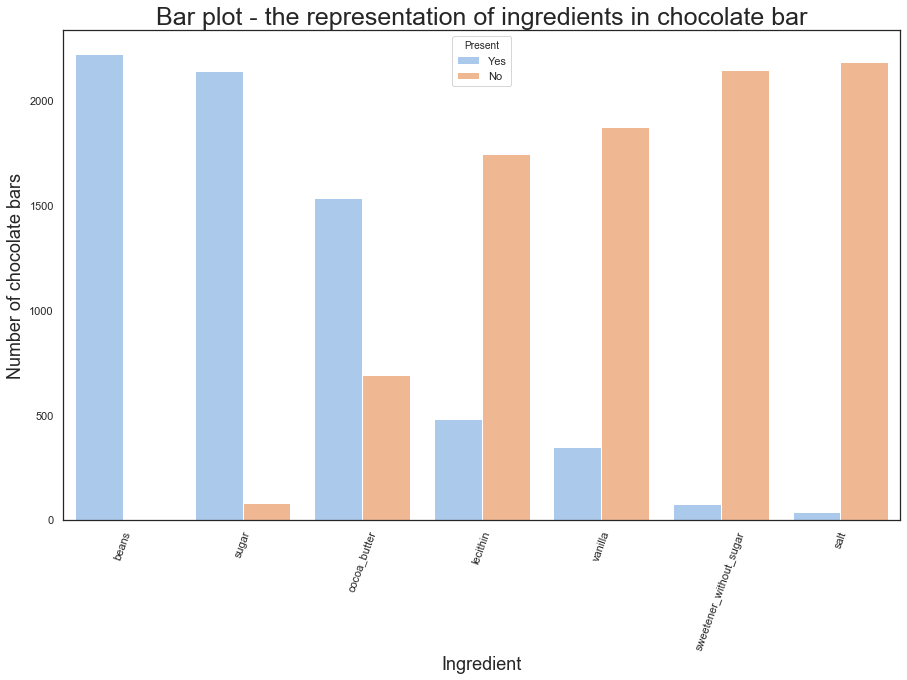

In [36]:
with sb.axes_style('white'):
    ingredients = ["beans", "sugar", "cocoa_butter", "lecithin", "vanilla", "sweetener_without_sugar","salt"]
    plt.figure(figsize=(15,9));
    ax = sb.barplot(x="Ingredient", y="count", hue="Present", data=g_ingredients,
               order=ingredients);
    ax.set_title('Bar plot - the representation of ingredients in chocolate bar', fontsize = 25)
    ax.set_xlabel('Ingredient', fontsize =18)
    ax.set_ylabel('Number of chocolate bars', fontsize =18)
    ax.set_xticklabels(ingredients, rotation= 70) 
    plt.show()

#link used to perform this bar plot
#https://seaborn.pydata.org/generated/seaborn.barplot.html

Beside of cocoa beans (which is present in all chocolates) there are other two most common ingredients in chocolate bars: sugar and cocoa_butter.


### Discussion about variables presented by Univariate graphs

The dataset is quite usable, however I had to do some tidy issues with columns which have info about ingredients and the columns that have an info about number of testing aromas of each chocolate bar.

> * we can observe that the number of testing chocolate bars grow steadily from 2006 till 2015 and after that, we can observe a declining number of tested chocolate bars. Especially there was a significant drop for 2017.
> * the chocolate bar rating range is going from 1 to 5, where we can observe that the majority of chocolate bars entered in the range between 2.5 and 4. We can see that only a small number of chocolate bars got a rate lower than 2.5, while there is no chocolate bar that had a rate higher of 4.
> * the cocoa percentage in chocolate bars has a range between 42 and 100, where it is possible to observe that data shows the normal distribution. We can also observe that most chocolate bars have a cocoa percentage between 60 and 80.
> * the reviewed chocolate bars have mostly 2 or 3 ingredients present.
> * regarding the association between variables we can observe two not very strong but negative associations between the count of ingredients and review date and count of ingredients and cocoa percentage.
> * there are numerous countries of cocoa beans origin where on the plot we showed the top of 20, where the top 5 of them are the most important producers of cocoa beans. Moreover, in the dataset, we have a name in country column: 'Blend', which is not a country but a set of countries that were grouped as it based by economical status by the World Bank. 
> * When we look at the country_location column we can observe that the reviewed chocolate bars are from companies that are based in the U.S.A.
> * The most frequent ingredient in chocolate bars were: cocoa beans, sugar, and cocoa_butter.

The company location is not very useful variable because as we saw that almost all companies are located in one country (the U.S.A), therefore to see some difference between companies that are located in different countries at this moment it does not have much sense, meaning this variable will not be used in consideration in next step.

Also, we can explore the association between variables by using a heat map plot and to confirm associations that we observed by scatter plots.

The next step is to investigate the number of ingredients and see if they have some influence on rating and cocoa percent. Moreover, we can also investigate if there is a difference in the rating and origin of cocoa beans.

In addition, even though I have prepared columns for chocolate bar tasting, I decided to not use it. And the reason is: there are a high number of different tastes, which makes it impossible to plot it properly. This part needs more time to do research about chocolate flavors and do a proper investigation to decide which part should be used in order to group it and do some meaningful plot.


## Bivariate Exploration

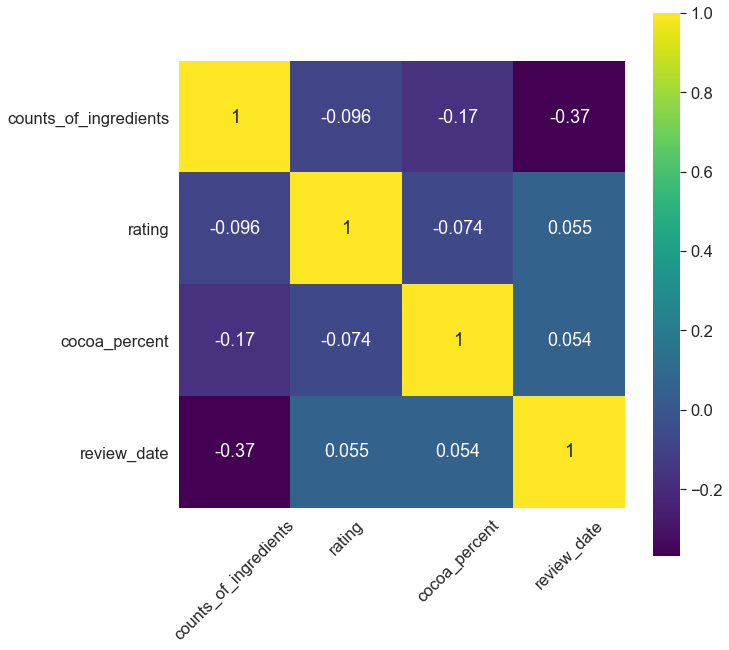

In [37]:
#choose variables
data_hm = dataset_hist_2[['counts_of_ingredients','rating', 'cocoa_percent', 'review_date']]

#delete group 1 and 6 - since we have only a few values in these two groups
data_hm = data_hm[data_hm['counts_of_ingredients'].isin([2,3,4,5])]
#heatmap plot - which shows correlations between chosen four variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sb.set(font_scale=1.5)
heat_map = sb.heatmap(data_hm.corr(), square=True, cmap=colormap, annot=True);
heat_map.set_xticklabels(heat_map.get_yticklabels(), rotation=45)
plt.show();

# from this plot we can see which variables are correlated and decide which ones we will use in order to build a model
# used link for build this plot https://likegeeks.com/seaborn-heatmap-tutorial/

In this graph we did not included all groups from the counts_of_ingredients variable, because group 1 and 6 had only a few samples.

Here we were confirmed a negative association shown on scatterplots, and on the heatmap plot we can observe -0.17 and -0.37 between cocoa_percent and counts_of_ingredients and between review_date and counts_of_ingredients, respectivetily.

From this heatmap, we can see that the number of ingredients has a major role in other variables, and which is says that it would not be advisable to have a chocolate with more ingredients.

Also we can see here a moderate negative correlation between review_date and counts_of ingredients which shows that through the years the chocolates bars tend to have less ingredients than at the beginigh of starting survey.


Moreover there is present a small negative correlation between rating and cocoa_percent  and ratig and counts_of_ingredients variables, which suggest that by if we increase the cocoa percent/counts_of_ingredients we can expect that the rating will go down. 

Few reason for these negative correlations could be: 
> cocoa_percent
 > * each person who test the chocolate may have some preference to specific chocolate flavor/s
 > * it depends on the country of bean origin that can be influence the chocolate flavor
 > * also season can change chocolate flavor as well and 
 > * in chocolate bar can be present low and high quality beans in a way that low quality beans can add some unwanted flavor
 
> counts_of_ingredients
 > * more ingredients means less cacao percentage with could change the chocolate flavor, chocolate consistance (how chocolate melt, break, etc.)


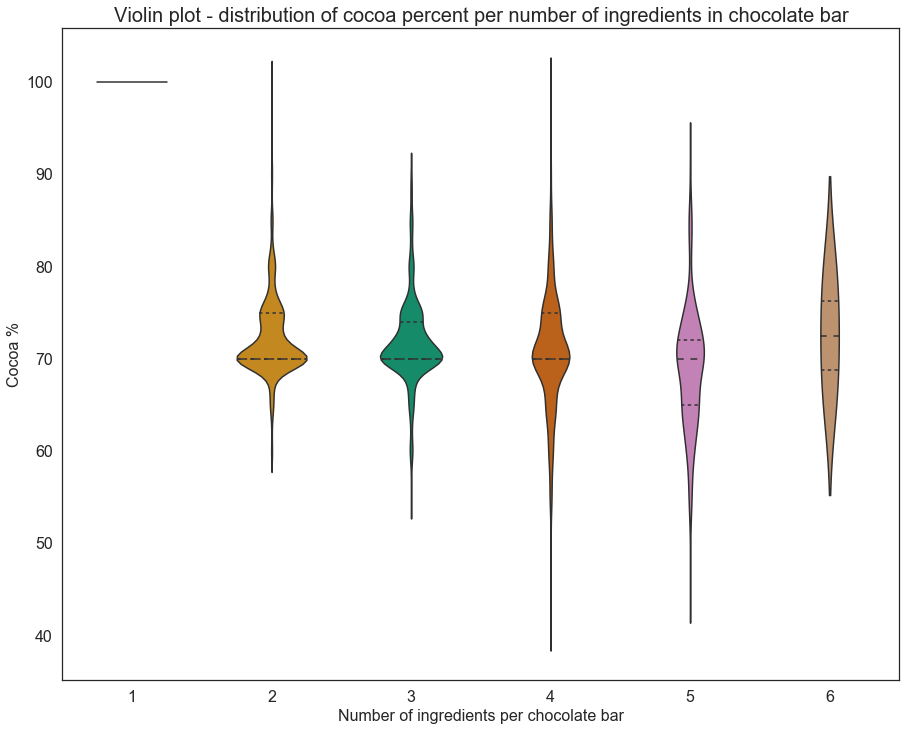

In [38]:
# build a violin plot 
# We want to plot the distibution of cocoa % and see how is distributed through different categories of count_of_ingredients variable
with sb.axes_style('white'):

    plt.figure(figsize=(15,12));
    sb.violinplot(y='cocoa_percent', x='counts_of_ingredients', 
                 data=dataset_hist_2, 
                 width=0.5,
                 palette="colorblind", inner="quartile");
#sb.set(font_scale=2,rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sb.axes_style("whitegrid", 'white');
    plt.title('Violin plot - distribution of cocoa percent per number of ingredients in chocolate bar', fontsize = 20);
    plt.xlabel('Number of ingredients per chocolate bar',fontsize = 16)
    plt.ylabel('Cocoa %',fontsize = 16);
    plt.xticks(fontsize = 16);
    plt.yticks(fontsize = 16);

The violin plot shows the relationship of cocoa percentage vs number of ingredients in the chocolate bar. In the first position where the number of ingredients is equal to 1 we know that it corresponds to the only one possible ingredient which is the cocoa bean, and that corresponds to the 100% of cocoa percentage. 
From shown violin plots we can see that the median for the number of ingredients equal to 6 is higher than for other categories of the number of ingredients. The shape of the distribution (in comparison with other violin plots it has even distribution with no to extreme outliers as other ones) indicates more-less even spread of cocoa percentage in chocolate bars that have a total of 6 ingredients (which can be due to small number of samples).

As we have seen from other plots, we know that the most common chocolate bars have a total of 2 or 3 ingredients. By observing these two violin plots we can observe that the shape of the distribution we can observe extremely skinny ends and two wide parts in the middle (one around the median and another around 3rd quartile) that indicate the number of chocolate bars is highly concentrated around these two mentioned components.

The other two violin plots (for a number of ingredients: 4 and 5) indicate that they have a lot of outliers (thin and long ends) and that their distributions have a wider spread. That indicates that these chocolates have a higher variation of cocoa percentage in chocolate bars than others shown categories.

In [39]:
# prepare data for the box plot
countries=dataset_hist_2['country_of_bean_origin'].value_counts().reset_index().head(10)
top_ten = list(countries['index']) #extract top ten countries

In [40]:
#select only top ten countries
top10_countries = dataset_hist_2[dataset_hist_2['country_of_bean_origin'].isin(top_ten)]

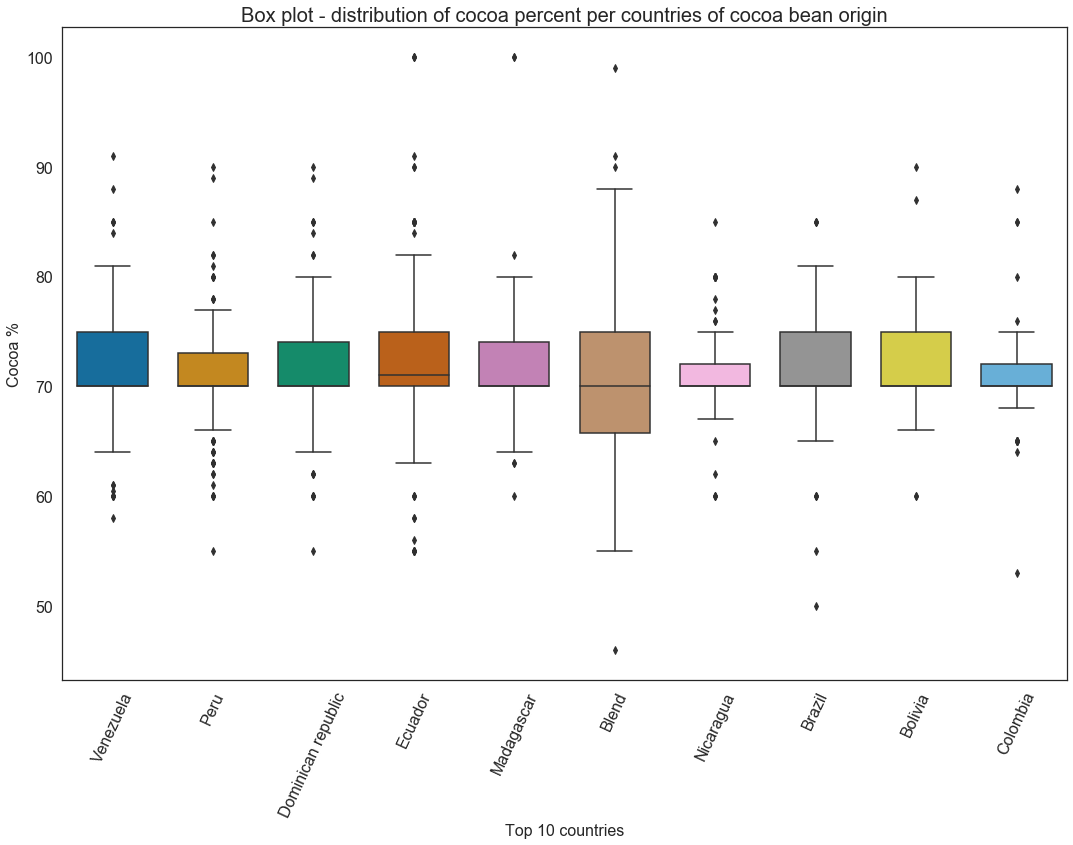

In [41]:
# build the violin plot
with sb.axes_style('white'):

    plt.figure(figsize=(18,12));
    sb.boxplot(y='cocoa_percent', x='country_of_bean_origin', 
                 data=top10_countries, 
                 width=0.7,
                 palette="colorblind", order=top_ten);
    #sb.swarmplot(y='cocoa_percent', x='country_of_bean_origin', 
    #             data=top10_countries, color=".30")
    plt.title('Box plot - distribution of cocoa percent per countries of cocoa bean origin', fontsize = 20);
    plt.xlabel('Top 10 countries',fontsize = 16)
    plt.ylabel('Cocoa %',fontsize = 16);
    plt.xticks(fontsize = 16, rotation = 65);
    plt.yticks(fontsize = 16);

All box plots have the median around 70% of cocoa beans, however, there is a one box plot which is comparatively tall in comparison with others, where the country origin is named Blend. We already mentioned that this is not a country, but several countries under one name (which is defined by the World Bank). The wide distribution spread could be influenced by different cocoa beans from different countries which were used by different companies that are producing chocolate bars with various cocoa percentages.

There are two comparatively short box plots (with a few outliers), from Nicaragua and Colombia, which suggest that cocoa beans are used in chocolate bars with similar cocoa percentages than chocolate bars from other mentioned countries.

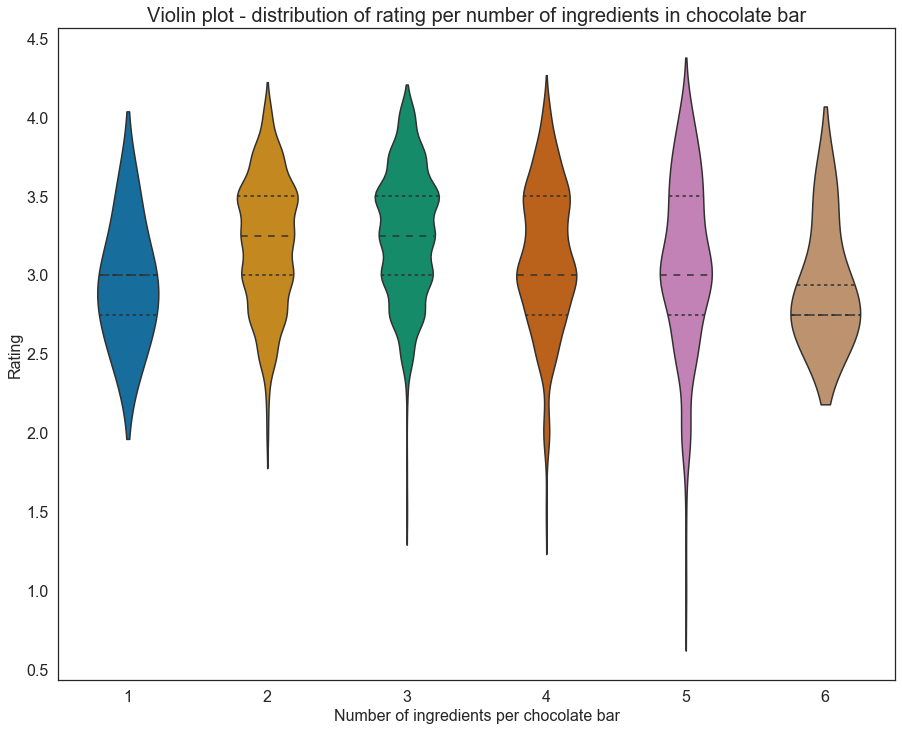

In [42]:
# build the violin plot
# in this plot we want to se the distribution of chocolate bar ratings that is divided by count_of_ingredients groups (number of ingredients per chocolate)

with sb.axes_style('white'):

    plt.figure(figsize=(15,12));
    sb.violinplot(y='rating', x='counts_of_ingredients', 
                 data=dataset_hist_2, 
                 width=0.5,
                 palette="colorblind", inner="quartile");
#sb.set(font_scale=2,rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sb.axes_style("whitegrid", 'white');
    plt.title('Violin plot - distribution of rating per number of ingredients in chocolate bar', fontsize = 20);
    plt.xlabel('Number of ingredients per chocolate bar',fontsize = 16)
    plt.ylabel('Rating',fontsize = 16);
    plt.xticks(fontsize = 16);
    plt.yticks(fontsize = 16);


Violin plot of the distribution of ratings by number of ingredients per chocolate bar. From this plot we can see that two groups (2 and 3 ingredients per chocolate bar) have a higher median than other groups, where the group with the highest number of ingredients have the lowest median. 

This suggest that having less than two and higher than 3 ingredient per chocolate bar will result in lower rating.

Moreover this plot shows additional insight about number of ingredients where it is shown that having 2 or 3 ingredients is more favorable. And taking into account the information about the moderate negative correlation between reviwe_date and number of ingredients, it is clear that companies through the time tend to have chocolate bars with 2 or 3 ingredients.

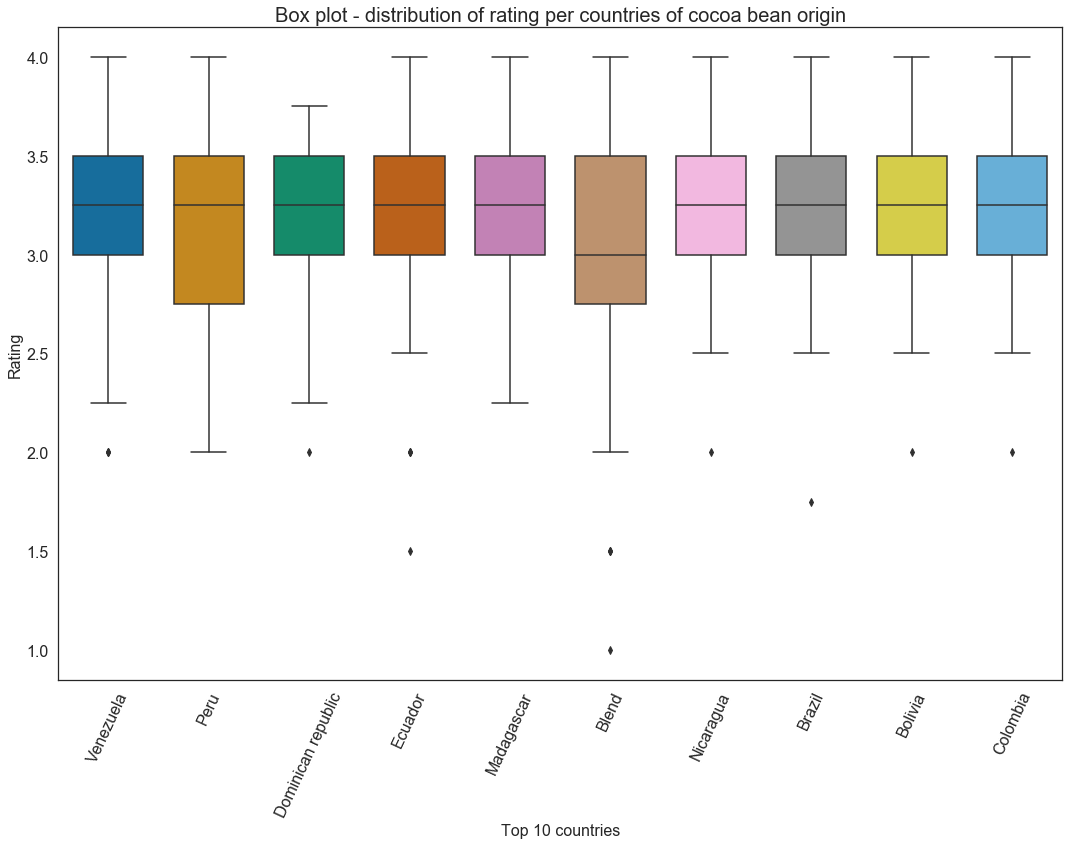

In [43]:
# build a box plot

# here I want to investigate distibution of ratings by taking into account top of ten countries of cocoa bean origin

with sb.axes_style('white'):

    plt.figure(figsize=(18,12));
    sb.boxplot(y='rating', x='country_of_bean_origin', 
                 data=top10_countries, 
                 width=0.7,
                 palette="colorblind", order=top_ten);
    #sb.swarmplot(y='cocoa_percent', x='country_of_bean_origin', 
    #             data=top10_countries, color=".30")
    plt.title('Box plot - distribution of rating per countries of cocoa bean origin', fontsize = 20);
    plt.xlabel('Top 10 countries',fontsize = 16)
    plt.ylabel('Rating',fontsize = 16);
    plt.xticks(fontsize = 16, rotation = 65);
    plt.yticks(fontsize = 16);

Here we can observe two comparatively tall box plots (Peru and Blend), however, the median of Peru corespond to the comparatively small box plots of other countries, while the median for Blend is much lower than the rating mean from other countries.

There are a few reasons why the Blend group have a lower median:
 > * Blend group is combination of a few countries 
 > * Cacao beans are lower quality than from other countries
 > * Cacao beans are used in chocolate bars which has more than three ingredients
 > * shown two outliers could have a major impact on meadian and distribution of that group

In [44]:
# exclude ratings that have are equal or lower 1.5 points 
# in this way we ensure that we exclude outliers and to check if these outliers have a great impact on tall box plots in Blend group.
rating_cut = top10_countries[top10_countries['rating']>1.5]


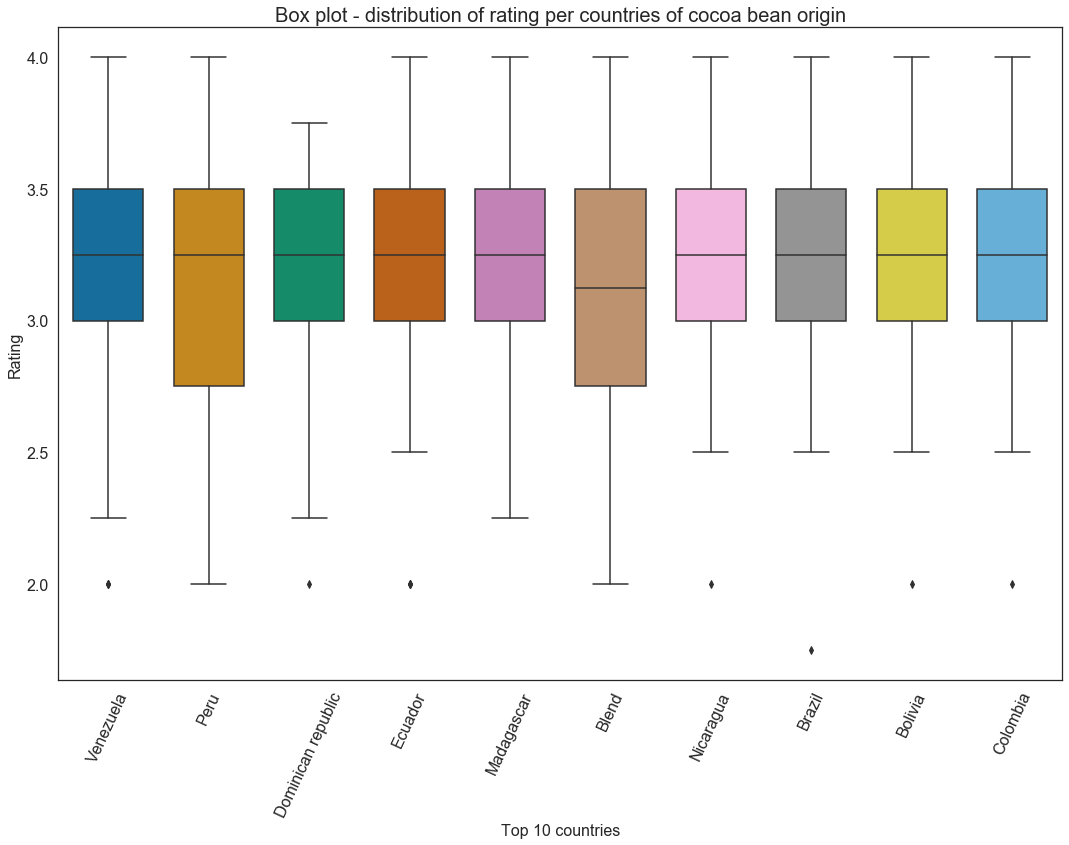

In [45]:
# build the box plot

with sb.axes_style('white'):

    plt.figure(figsize=(18,12));
    sb.boxplot(y='rating', x='country_of_bean_origin', 
                 data=rating_cut, 
                 width=0.7,
                 palette="colorblind", order=top_ten);
    #sb.swarmplot(y='cocoa_percent', x='country_of_bean_origin', 
    #             data=top10_countries, color=".30")
    plt.title('Box plot - distribution of rating per countries of cocoa bean origin', fontsize = 20);
    plt.xlabel('Top 10 countries',fontsize = 16)
    plt.ylabel('Rating',fontsize = 16);
    plt.xticks(fontsize = 16, rotation = 65);
    plt.yticks(fontsize = 16);

When we excluded rating points that are equal to and lower than 1.5 we can observe small change in Blend group, which suggest that outliers had small influence on rating median and distribution of this group. Therefore, other possible features have a role on why ratings of chocolate bars for this group is lower in comparison with other countries groups.

### Discussion about variables presented by Bivariate graphs

By using a heatmap, a violin and box plot we have gaind additional insights about variables and their relationships.

> by the heatmap plot we have discussed association between four different variables (ratings, cocoa %, review date and number of ingredients). We have observed that all variables were at some point negatively correlated with number of ingredients, which implicate that this variable is a variable that should be investigate more throughly. Besides, we should also investigate this variable in combination with rating and cocoa %.

> We used the violin and the box plots to investigate the distribution of rating and cocoa % per groups of two variables (top ten countries and number of ingredents). 

Regarding the cocoa % variable:
 > From the violin plot we can observe a few things: 
 > - group 2 and 3 have more consistent distribution in comparison with group 4 and 5 where the span of cocoa % is way wider than for group 2 and 3. Also, we can observe on all groups (2,3,4 and 5) skinny ends where for group 2 and 3 this end is much longer one side, which implicates that chocolates with extreme values are the one that has a higher cocoa %, while in group 4 and 5 both ends were extremely skinny and went in both directions evenly.
> From the box plot:
> - all box plots had the median around 70 cocoa %, however, one box plot for Blend group was comparatively much taller than other box plots. The major reason why this happened is because this is not a country, but a group of countries which were defined by the World Bank. Therefore, the wide distribution spread could be influenced by different cocoa beans from different countries which were used by different companies that are producing chocolate bars with various cocoa percentages.
> - moreover, there are two comparatively short box plots (with a few outliers), from Nicaragua and Colombia, which suggest that cocoa beans are used in chocolate bars with similar cocoa percentages than chocolate bars from other mentioned countries.

Regarding the rating variable:
> The violin plot:
> - this plot showed that two groups (2 and 3 ingredients per chocolate bar) have a higher median than other groups, where the group with the highest number of ingredients have the lowest median. 
> - This suggest that having less than two and higher than 3 ingredient per chocolate bar will result in lower rating.
> From the two box plots (from the second one we delete values that are equal or less than 1.5):
> - we observed two comparatively tall box plots (Peru and Blend), however, the median of Peru corespond to the comparatively small box plots of other countries, while the median for Blend is much lower than the rating mean from other countries. In order to see if outliers have influence on the median for group Blend we deleted them and build another plot. From it we saw that the outliers had a small influence on the median, and that implicate that other factors are implicated.


## Multivariate Exploration


In [46]:
# prepare dataset for the plot
three_countries = dataset_hist_2[dataset_hist_2['country_of_bean_origin'].isin(['Peru', 'Venezuela', 'Blend'])]

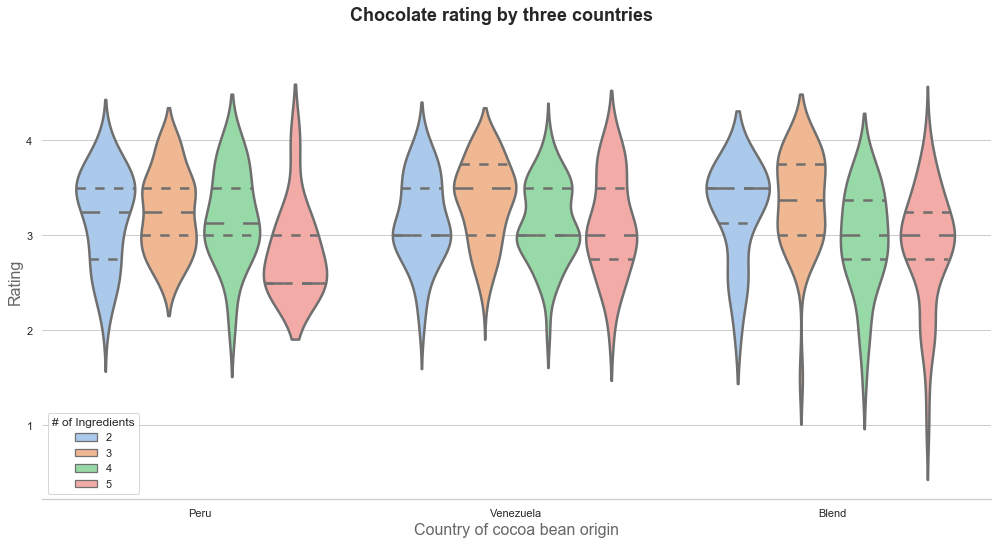

In [47]:
# build violin plots
# we decided to investigate more the rating distribution in three choosen countries where we also included number of ingredients groups
# I was courius to see if there is a difference in rating distribution between groups of number of ingredients and 
# if they have some influence on median in Blend group (group of countries)

sb.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(17, 8))

# Draw a nested violinplot and split the violins for easier comparison
sb.violinplot(x="country_of_bean_origin", y="rating", hue="counts_of_ingredients", data=three_countries, linewidth=2.5,inner="quartile")
sb.despine(left=True)

f.suptitle('Chocolate rating by three countries', fontsize=18, fontweight='bold')
ax.set_xlabel("Country of cocoa bean origin",size = 16,alpha=0.7)
ax.set_ylabel("Rating",size = 16,alpha=0.7)
plt.legend(title = '# of Ingredients',loc='lower left');

On this Violin plot we ploted three difrerent variables: Rating, Country of coroa bean origin and Number of ingredients.

I decided to choose these three countries, in order to investigate why the median and distribution of Peru and Blend group is different than Venezuela group (Other countries on plot before this had almost exaclty the same median with shlightly different distirbution spread).

What we can observe is that all three countries do not have a chocolate bars with a number of ingredients equalt to 1 or 6.

Also, what we can observe in Venezuela group is that chocolate bars with different number of ingredients tend to get a simillar rating, while in other two groups (Peru and Blend) we can see that the chocolate bar with number of ingredients equal to 5 tends to get lower ratings in comparison with other chocolate bars with less number of ingredients.


In [48]:
#prepare dataset for the line plot

dat1 = dataset_hist_2.groupby(['review_date','counts_of_ingredients'])['rating'].mean().reset_index(name='rating_mean')
dat2 = dataset_hist_2.groupby('review_date')['counts_of_ingredients'].value_counts().reset_index(name='count')

dat_count_mean = pd.merge(dat1, dat2, on=['review_date', 'counts_of_ingredients'], how='left')
dat_count_mean.head()

,review_date,counts_of_ingredients,rating_mean,count
0,2006,2,3.250000,3
1,2006,3,3.392857,7
2,2006,4,3.133333,15
3,2006,5,2.950000,35
4,2007,2,3.365385,13


In [49]:
# list of years which will be used for build the plot (plt.xticks)
years = list(dataset_hist_2['review_date'].drop_duplicates())
print(years)

[2019, 2012, 2013, 2014, 2015, 2016, 2018, 2020, 2011, 2009, 2010, 2017, 2007, 2008, 2006]


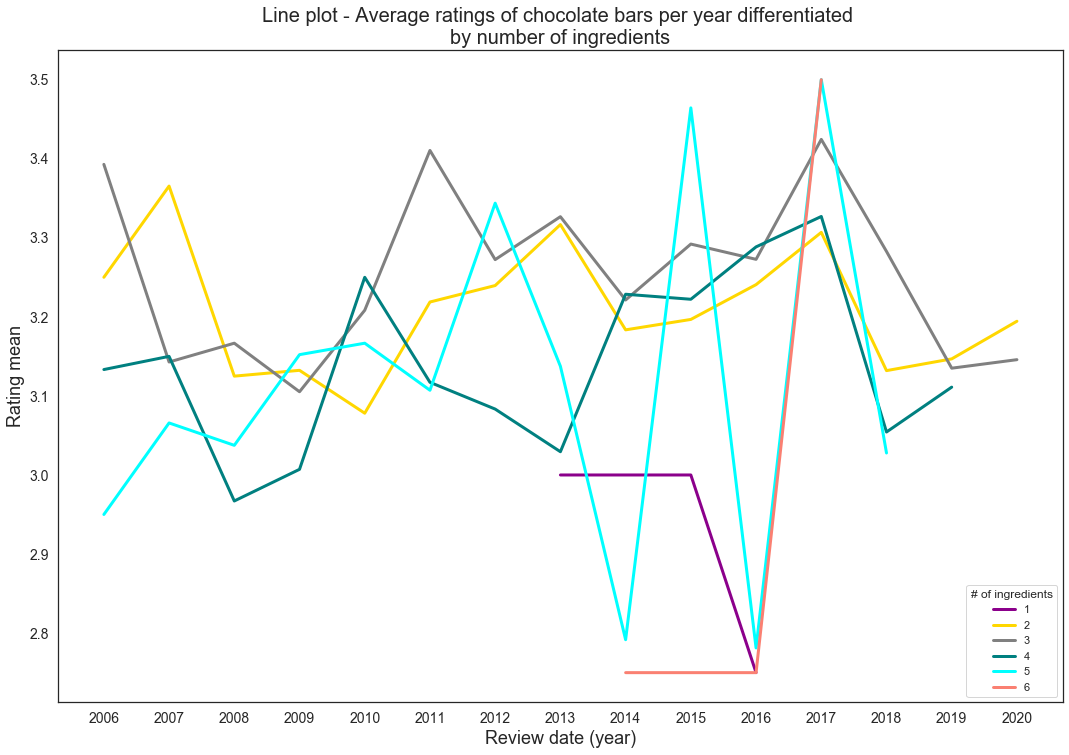

In [50]:
#list of colors
colors = [None,"darkmagenta", "gold", "grey", "teal", "aqua", "salmon"] # colors for a line plot

# build the line plot
# Here I wanted to explore rating mean through the years and also I separated it by the number of ingredients groups
with sb.axes_style('white'):
    plt.figure(figsize=(18,12))
    for i in range(1,7):
        df = dat_count_mean[dat_count_mean['counts_of_ingredients']== i]
        plt.plot(df['review_date'], df['rating_mean'], color= colors[i],linewidth = 3, label = i)
        
    plt.xlabel('Review date (year)', fontsize = 18)
    plt.ylabel('Rating mean', fontsize = 18)
    plt.title('Line plot - Average ratings of chocolate bars per year differentiated \nby number of ingredients', fontsize = 20)
    plt.legend(title = '# of ingredients',loc='lower right');
    plt.xticks(years, fontsize = 14)
    plt.yticks( fontsize = 14)
    plt.show()

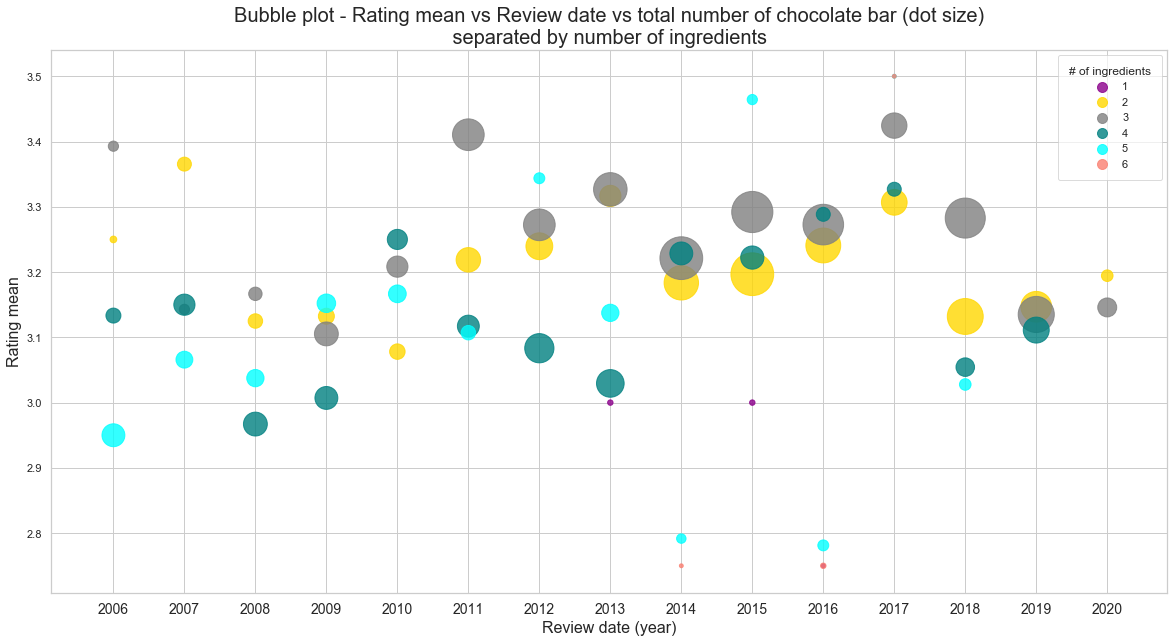

In [51]:
# bubble plot 
# I was courius to see add additional variable to plot above, to check for the number of samples per each group of ingredients. 
# Moreover I wanted to see if the number of chocolate bars for specific group increased or decreased through the years

with sb.axes_style('whitegrid'):
    #count = dat_count_mean['count']
    plt.figure(figsize= (20,10))
    
    for i in range(1,7):
        df = dat_count_mean[dat_count_mean['counts_of_ingredients']== i]
        sb.regplot(x="review_date", y="rating_mean", data=df, 
                   fit_reg=False, scatter_kws={"s": df['count']*15}, #to obtain bubble plot
                   color = colors[i], label = i); 
    plt.title("Bubble plot - Rating mean vs Review date vs total number of chocolate bar (dot size)\n separated by number of ingredients ", fontsize=20)
    plt.ylabel("Rating mean", fontsize=16);
    plt.xlabel("Review date (year)", fontsize=16);
    #plt.legend(title = '# of ingredients',loc='upper right');
    
    plt.xticks(years, fontsize = 14)
    # Legend for State colours
    lgd = plt.legend(numpoints=1, loc=1, borderpad=1, 
            frameon=True, framealpha=0.7, title="# of ingredients")
    for handle in lgd.legendHandles:
        handle.set_sizes([100.0])

Rewiew of two plots:

The line plot is showing us how the rating means are changing through the years (from 2006 to 2020) where the rating means are also grouped by a number of ingredients.

Since we know that there were only a few samples of chocolate bars that had 1 or 6 ingredients, we should take cautiously sudden rise and fall of these chocolate bar ratings (that info we can observe on bubble plot (purple and dark blue dots). 

Regarding other, for groups (number of ingredients: 2,3,4,5) we can observe that the most reliable chocolate ratings through years had a chocolate bar with two ingredients followed by other chocolate bars with 3, 4, and 5 ingredients, respectively.

In the Bubble plot, I have a total of the number of chocolate bars, which are grouped by review for a specific year and for specific ingredient categories, in order to augment the size of the bubble that it can be easier to observe the data on the plot.

From the bubble plot, when we observe the size of dots (which is defined by number of reviewed chocolate bars grouped by number of ingrediendts and reviewed year) we can see the increase in number of chocolates that have 2 or 3 ingridients and decreasing/slightly constant number of chocolate bars which have 4 or 5 number of ingredients.



In [52]:
#Since having ten lines on plot is too much, insted of using top ten countries, we will take into account top five countries
# prepare data for the bar plot
countries=dataset_hist_2['country_of_bean_origin'].value_counts().reset_index().head(5)
top_five = list(countries['index']) #extract top five countries
print(top_five)
#sub dataset that select only top five countries
top_5_countries = dataset_hist_2[dataset_hist_2['country_of_bean_origin'].isin(top_five)]

['Venezuela', 'Peru', 'Dominican republic', 'Ecuador', 'Madagascar']


In [53]:
#prepare dataset for the line plot

dat1_1 = top_5_countries.groupby(['country_of_bean_origin','review_date'])['rating', 'cocoa_percent'].mean().reset_index()
dat2_2 = top_5_countries.groupby('review_date')['country_of_bean_origin'].value_counts().reset_index(name='count')

dat1_count_mean = pd.merge(dat1_1, dat2_2, on=['country_of_bean_origin', 'review_date'], how='left')
dat1_count_mean.head()

/Users/matlija/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,country_of_bean_origin,review_date,rating,cocoa_percent,count
0,Dominican republic,2006,3.375000,70.500000,2
1,Dominican republic,2007,3.250000,73.500000,2
2,Dominican republic,2008,3.000000,70.600000,5
3,Dominican republic,2009,3.250000,70.125000,8
4,Dominican republic,2010,3.142857,72.285714,7


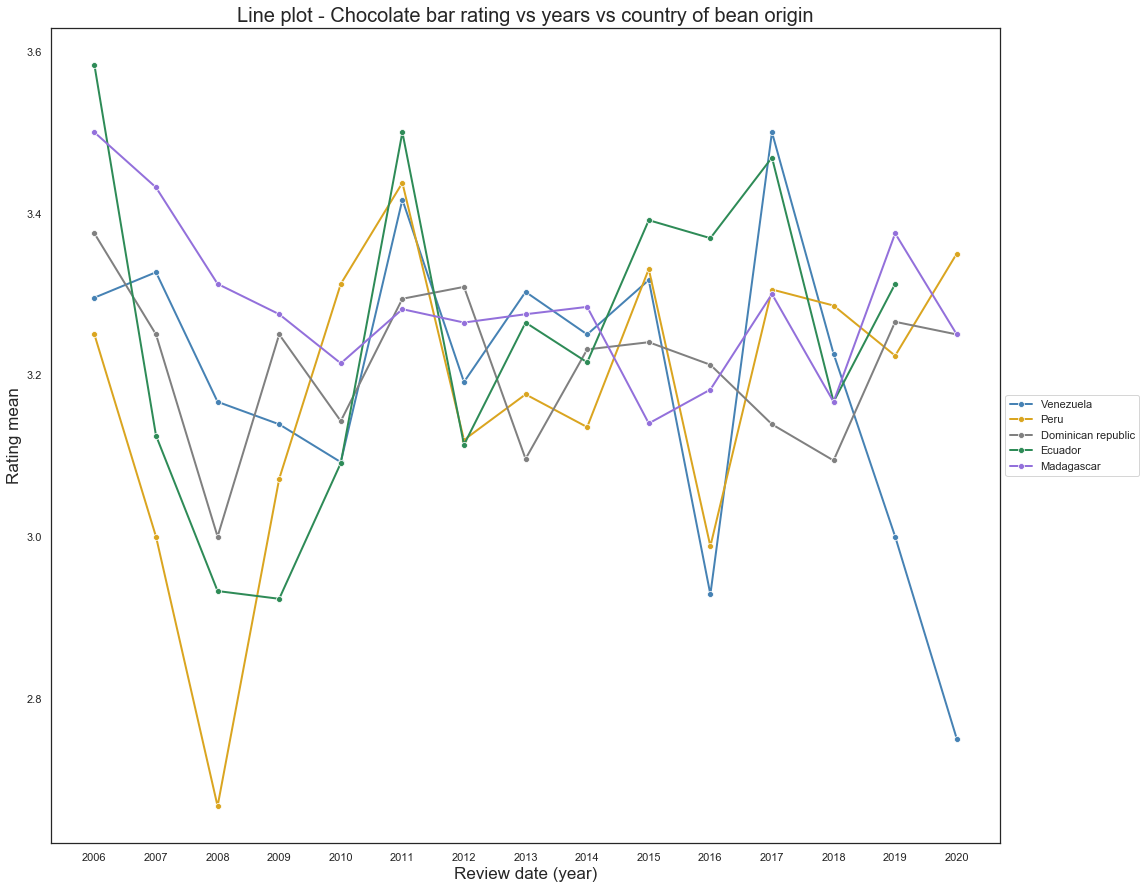

In [54]:
# set colors for plot
colors = ["steelblue", "goldenrod", "grey", "seagreen", "mediumpurple"]
#Line plot
# use a line plot to see how rating mean is distributed through years in top five countries

with sb.axes_style('white'):
    rating = top_5_countries['rating']
    plt.figure(figsize= (17,15))
    for i in range(0,5):
        sb.lineplot(x="review_date",
            y="rating", 
            data=dat1_count_mean[dat1_count_mean['country_of_bean_origin']==top_five[i]],marker='o', linewidth = 2,
            color = colors[i], label = top_five[i]); 
    plt.title("Line plot - Chocolate bar rating vs years vs country of bean origin", fontsize=20)
    plt.ylabel("Rating mean", fontsize=17);
    plt.xlabel("Review date (year)", fontsize=17);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(years)

# 
#colors
#https://matplotlib.org/3.1.0/tutorials/colors/colors.html

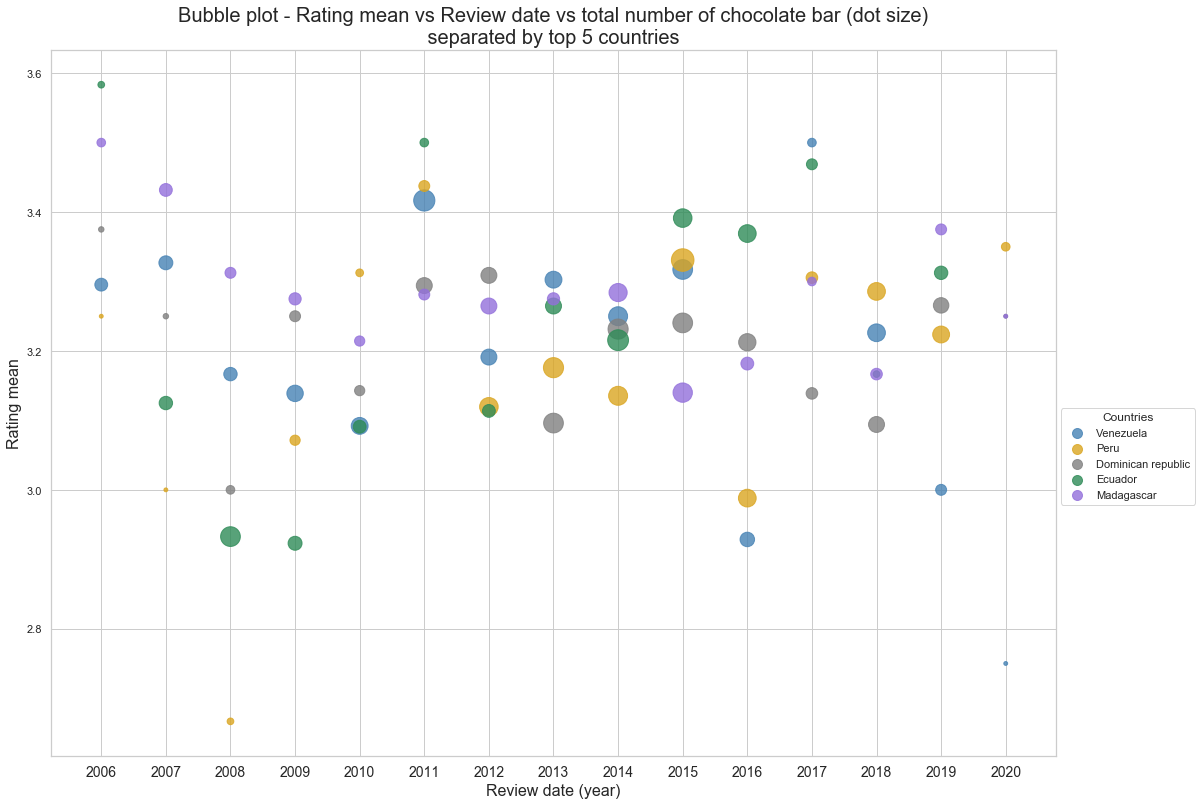

In [55]:
#set colors for the plot
colors = ["steelblue", "goldenrod", "grey", "seagreen", "mediumpurple"]
# build bubble plot
# I have upgraded line plot from above in a way that I have added additional info - the number reviewed chocolates bars per country

with sb.axes_style('whitegrid'):
    #count = dat_count_mean['count']
    plt.figure(figsize= (18,13))
    i = 0
    for name in top_five:
        
        df = dat1_count_mean[dat1_count_mean['country_of_bean_origin']== name]
        sb.regplot(x="review_date", y="rating", data=df, 
                   fit_reg=False, scatter_kws={"s": df['count']*15}, #to obtain bubble plot
                   color = colors[i], label = name); 
        i=i+1
    plt.title("Bubble plot - Rating mean vs Review date vs total number of chocolate bar (dot size)\n separated by top 5 countries ", fontsize=20)
    plt.ylabel("Rating mean", fontsize=16);
    plt.xlabel("Review date (year)", fontsize=16);
    #plt.legend(title = '# of ingredients',loc='upper right');
    
    plt.xticks(years, fontsize = 14)
    
    # Legend for State colours
    lgd = plt.legend(bbox_to_anchor=(1, 0.5), title="Countries")
    for handle in lgd.legendHandles:
        handle.set_sizes([100.0])

On two plots above I have explored more variables to observe additional relationship between them.

Here we were concentrated on top five countries (the highest number of reviwed chocolate bars through all period) to observe how chocolates bars were reviewed through years. Additionaly on second plot we added additional variable (the number reviwed chocolate bars per year and country).

The 2020 are not very representable since this year is a bit expeptional becasue of COVID-19 situation and because it is not finished. Hence there are plenty of time to do reviws on chocolate bars for this year, if they will be conducted taking into account overall situation.

On both plots we can observe that first years (from 2006 to 2008) there are small number of rewied samples per countries and the rating is not very impresive since some chocolates had very low rating esspesialy chocolate beans from Peru and Ecuador. Afterwards, the ratings started increasinf for all observed countries where the rating means were more less constant for next years. 

The chocolates bars that are made from cocoa bean that is coming from Madagascar have the highest rating mean in comparison with other four countries. From the size of bubble we can observe that number of chcolate bars did not increased too much.

The chocolate bars with origin form Ecuador had biggest osscilation in rating mean between years. Also it is interesting to observe that at first the rating mean was high (the highest point of all chocolate bars) and then imidiately in next two years it droped down and then again in two years it rised and after that there were small oscilations between years in rating means. 




### Discussion about variables presented by Multivariate graphs

In this part I have produced a total of five plots which included more than 2 variables.

> Violin plot:
> -  took into account a total of three variables: Rating mean , Country of coroa bean origin (three countries) and the Number of ingredients.
> - the reason behind these three countries is that I did not wanted to have too many countries on the plot, because then it would be difficult to see differences in violin plots. The Venezuela country is taken because it is the one that is the most common and it violin plot was similar to other coutries, and other two countries were (Peru and Bled) since they had comparatively wider plots than other countries.
> - What we observed is that all three countries do not have a chocolate bars with a number of ingredients equalt to 1 or 6.
> - Also, what we can observe in Venezuela group is that chocolate bars with different number of ingredients tend to get a simillar rating, while in other two groups (Peru and Blend) we can see that the chocolate bar with number of ingredients equal to 5 tends to get lower ratings in comparison with other chocolate bars with less number of ingredients.

> Line and Bubble plots (rating, number of ingredients):
> - are showing us how the rating means are changing through the years (from 2006 to 2020) where the rating means are also grouped by a number of ingredients, with exeptions that Bubble plot had additional feature which is the total number of chocolate bars per year and number of ingredients groups.
> - Since we know that there were only a few samples of chocolate bars that had 1 or 6 ingredients, we should take cautiously sudden rise and fall of these chocolate bar ratings (that info we can observe on bubble plot (purple and dark blue dots).
> - Regarding other, for groups (number of ingredients: 2,3,4,5) we can see that the most reliable chocolate ratings through years had a chocolate bar with two ingredients followed by other chocolate bars with 3, 4, and 5 ingredients, respectively.
> - From the bubble plot, when we observe the size of dots, we can see the increase in number of chocolates that have 2 or 3 ingridients and decreasing/slightly constant number of chocolate bars which have 4 or 5 number of ingredients.


> Line and Bubble plots (rating, countries of bean origin):
> - we concentrated on top five countries to observe how chocolates bars were reviewed through years. Additionaly on second (Bubble) plot  we added additional variable (the number reviwed chocolate bars per year and country)
> - The 2020 are not very representable since this year is a bit expeptional becasue of COVID-19 situation and because it is not finished. Hence there are plenty of time to do additional reviws on chocolate bars for this year, if they will be conducted taking into account current situation.
> - On both plots we can observe that first years (from 2006 to 2008) there are small number of rewied samples per countries and the rating is not very impresive since some chocolates had very low rating esspesialy chocolate beans from Peru and Ecuador. Afterwards, the ratings started increasinf for all observed countries where the rating means were more less constant for next years.
> - The chocolates bars that are made from cocoa bean that is coming from Madagascar have the highest rating mean in comparison with other four countries. From the size of bubble we can observe that number of chcolate bars did not increased too much.
> - The chocolate bars with origin form Ecuador had the biggest osscilation in rating mean between years. Also it is interesting to observe that at first the rating mean was high (the highest point of all chocolate bars) and then imidiately in next two years it droped down and then again in two years it rised and after that there were small oscilations between years in rating means.